In [ ]:
!pip install nltk

In [ ]:
# imports the essential libraries
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/ML Project Dataset/fake_real.csv', sep=',', encoding='utf-8', quotechar='"')


In [ ]:
# Filter the DataFrame for fake news
fake_df = df[df['Type'] == 'fake']

# Filter the DataFrame for true news
true_df = df[df['Type'] == 'true']

In [ ]:
fake_df.head()

,Unnamed: 0,Content,Title,Type
2,2,saturday paul ryan posted photo instagram phot...,News,fake
3,3,america keeps waiting word hillary indicted ob...,politics,fake
4,4,religion peace ht weasel zippers,left-news,fake
5,5,leave obama politicize money think past presid...,Government News,fake
6,6,knew donald trump would nightmare supreme cour...,News,fake


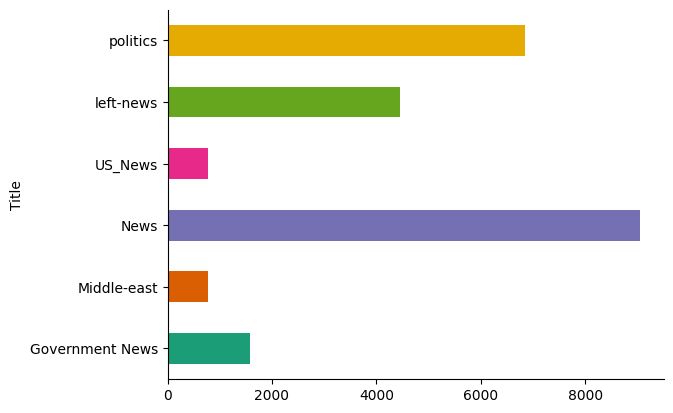

In [ ]:
# @title Title

from matplotlib import pyplot as plt
import seaborn as sns
fake_df.groupby('Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
true_df.head()

,Unnamed: 0,Content,Title,Type
0,0,new york reuters us environmental group sierra...,politicsNews,true
1,1,washington reuters us air force asked industry...,politicsNews,true
8,8,kiev reuters outgoing us vice president joe bi...,politicsNews,true
9,9,detroit reuters quality problems prompted two ...,politicsNews,true
11,11,valletta reuters police believe bomb killed pr...,worldnews,true


# **Target Feature**

In [ ]:
fake_df['class']=0
true_df['class']=1

<ipython-input-8-20fbf58e0454>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df['class']=0
<ipython-input-8-20fbf58e0454>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_df['class']=1


In [ ]:
fake_df.shape, true_df.shape

((23481, 5), (21417, 5))

In [ ]:
fake_df_manual_testing = fake_df.tail(10)
for i in range(23480, 23470, -1):
    if i in fake_df.index:
        fake_df.drop(i, axis=0, inplace=True)

true_df_manual_testing = true_df.tail(10)
for i in range(21416, 21406, -1):
    if i in true_df.index:
        true_df.drop(i, axis=0, inplace=True)

<ipython-input-10-d6a9727ab02b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df.drop(i, axis=0, inplace=True)
<ipython-input-10-d6a9727ab02b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df.drop(i, axis=0, inplace=True)
<ipython-input-10-d6a9727ab02b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df.drop(i, axis=0, inplace=True)
<ipython-input-10-d6a9727ab02b>:4: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
fake_df.shape, true_df.shape

((23477, 5), (21410, 5))

In [ ]:
fake_df_manual_testing['class']=0
true_df_manual_testing['class']=1

<ipython-input-12-e962bd60046c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df_manual_testing['class']=0
<ipython-input-12-e962bd60046c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_df_manual_testing['class']=1


In [ ]:
fake_df_manual_testing.head(10)

,Unnamed: 0,Content,Title,Type,class
44881,44881,watching sports tv going football stadium watc...,left-news,fake,0
44883,44883,donald trump never tried hide fact misogynisti...,News,fake,0
44884,44884,secret large percentage trump administration t...,News,fake,0
44885,44885,president donald trump take long put stamp ova...,politics,fake,0
44886,44886,earlier month sinkhole opened outside donald t...,News,fake,0
44887,44887,truly shocking roy moore takes commanding lead...,politics,fake,0
44889,44889,21st century wire says 2011 secretary state hi...,Middle-east,fake,0
44891,44891,woman going try keep trump think safe say deba...,left-news,fake,0
44894,44894,reckless hillary cared less seriousness exposi...,politics,fake,0
44896,44896,donald trump getting heavy media coverage late...,News,fake,0


In [ ]:
true_df_manual_testing.head(10)

,Unnamed: 0,Content,Title,Type,class
44878,44878,brussels reuters eu chief executive jeanclaude...,worldnews,true,1
44879,44879,washington reuters president donald trump’s do...,politicsNews,true,1
44880,44880,caracas reuters venezuela opposition received ...,worldnews,true,1
44882,44882,sacramento calif reuters california voters tue...,politicsNews,true,1
44888,44888,moscow reuters kremlin touch us presidentelect...,politicsNews,true,1
44890,44890,berlin reuters members germany social democrat...,worldnews,true,1
44892,44892,lima reuters teachers peru started returning c...,worldnews,true,1
44893,44893,new york reuters myanmar national security adv...,worldnews,true,1
44895,44895,montevideo reuters lucia topolansky uruguay se...,worldnews,true,1
44897,44897,jakarta reuters indonesian security forces eas...,worldnews,true,1


In [ ]:
data_merge = pd.concat([fake_df,true_df],axis=0)
data_merge.head()

,Unnamed: 0,Content,Title,Type,class
2,2,saturday paul ryan posted photo instagram phot...,News,fake,0
3,3,america keeps waiting word hillary indicted ob...,politics,fake,0
4,4,religion peace ht weasel zippers,left-news,fake,0
5,5,leave obama politicize money think past presid...,Government News,fake,0
6,6,knew donald trump would nightmare supreme cour...,News,fake,0


In [ ]:
data_merge.columns

Index(['Unnamed: 0', 'Content', 'Title', 'Type', 'class'], dtype='object')

In [ ]:
data = data_merge.drop(['Unnamed: 0','Title', 'Type'],axis=1)

In [ ]:
# Remove rows with missing values
data = data.dropna()

# Fill missing values in 'Content' column with an empty string
data['Content'].fillna('', inplace=True)

In [ ]:
data.isnull().sum()

Content    0
class      0
dtype: int64

In [ ]:
data = data.sample(frac=1)

In [ ]:
data.head()

,Content,class
2960,beijing reuters china foreign ministry said tu...,1
39098,dublin reuters ireland minister social protect...,1
20253,beirut reuters convoy islamic state fighters f...,1
8741,brusselsdublin reuters united kingdom ireland ...,1
2451,beijing reuters trip beijing last week zimbabw...,1


In [ ]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['Content', 'class'], dtype='object')

In [ ]:
data.head()

,Content,class
0,beijing reuters china foreign ministry said tu...,1
1,dublin reuters ireland minister social protect...,1
2,beirut reuters convoy islamic state fighters f...,1
3,brusselsdublin reuters united kingdom ireland ...,1
4,beijing reuters trip beijing last week zimbabw...,1


**Step 9: Create a Function to Clean Text**

In [ ]:
def wordopt(Content):
    Content = Content.lower()
    Content = re.sub('\[.*?\]', '', Content)
    Content = re.sub("\\W", '', Content)
    Content = re.sub('https?://\S+/www\.\S+', '', Content)
    Content = re.sub('<.*?>+', '', Content)
    Content = re.sub('[%s]' % re.escape(string.punctuation), '', Content)
    Content = re.sub('\n', '', Content)
    Content = re.sub('\w*\d\w*', '', Content)
    return Content

**Step 10: Applying Function to Text Column and Assigning X and Y**

In [ ]:
data['content']=data['Content'].apply(wordopt)

In [ ]:
x=data['Content']
y=data['class']

**Step 11: Defining Training and Testing Data and Splitting Them Into &5 -25 Percent Ratio.**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25)

**Step 12: Converting Raw Data Into Matrix for Further Process**

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

**Step 13: Logistics Regression**

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

**Step 14: Checking the Model Accuracy and Classification Report**

In [ ]:
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5674
           1       0.99      0.99      0.99      5390

    accuracy                           0.99     11064
   macro avg       0.99      0.99      0.99     11064
weighted avg       0.99      0.99      0.99     11064



**Step 15: Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

**Step 16: Checking the Model Accuracy and Classification Report**

In [ ]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5674
           1       1.00      1.00      1.00      5390

    accuracy                           1.00     11064
   macro avg       1.00      1.00      1.00     11064
weighted avg       1.00      1.00      1.00     11064



**Step 17: Test with Unseen Data**

In [ ]:
def manual_testing(news):
    # Preprocess the input news
    processed_news = wordopt(news)

    # Create a DataFrame with the processed news
    testing_news = {"content": [processed_news]}
    new_def_test = pd.DataFrame(testing_news)

    # Apply the same preprocessing steps as in training
    new_def_test["content"] = new_def_test["content"].apply(wordopt)

    # Transform the input news using the trained vectorizer
    new_x_test = new_def_test["content"]
    new_xv_test = vectorization.transform(new_x_test)

    # Perform predictions using the trained models
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)

    # Print the predictions
    print("\n\nLR Prediction:", output_lable(pred_LR[0]))
    print("DT Prediction:", output_lable(pred_DT[0]))

# Take input news from the user
news = str(input("Enter the news article: "))

# Perform manual testing
manual_testing(news)

Enter the news article: A legal challenge to abolish the NLRB is just the most obvious attempt by the ruling class to squash the rise of working class militancy in the US.


LR Prediction: Fake News
DT Prediction: Fake News


In [ ]:
news=str(input())
manual_testing(news)

A legal challenge to abolish the NLRB is just the most obvious attempt by the ruling class to squash the rise of working class militancy in the US.


LR Prediction: Fake News
DT Prediction: Fake News


## Conclusion

The f1-score is too good to be true. There are at least 3 items to address:
- Remove stopwords and lemmatization
- Tune logistics regression and decision tree hyperparameters and paramenters
- Test both true and fake news
